## Crop Game view

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.misc
import numpy as np

# This is just important on my machine that has 2 Gpus (Where one is not supported by Tensorflow)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Type: <class 'numpy.ndarray'> shape: (256, 256, 3) numpy type: uint8


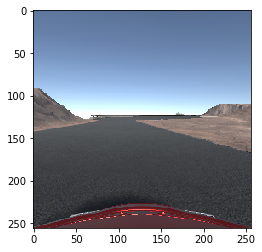

In [2]:
img = scipy.misc.imread('2.png', mode='RGB')
print('Type:',type(img),'shape:',img.shape,'numpy type:',img.dtype)
plt.imshow(img)
plt.show()

## Crop top part (Numpy)

Type: <class 'numpy.ndarray'> shape: (130, 256, 3) numpy type: uint8


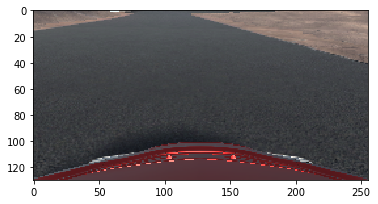

In [3]:
# Crop rows from bottom part downto 130)
img_crop_up = img[-130:]
print('Type:',type(img_crop_up),'shape:',img_crop_up.shape,'numpy type:',img_crop_up.dtype)
plt.imshow(img_crop_up)
plt.show()

## Crop bottom part (Numpy)

Type: <class 'numpy.ndarray'> shape: (100, 256, 3) numpy type: uint8


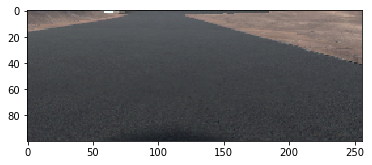

In [4]:
# Crop rows from 0 to 100.
img_crop_down = img_crop_up[0:100]
print('Type:',type(img_crop_down),'shape:',img_crop_down.shape,'numpy type:',img_crop_down.dtype)
plt.imshow(img_crop_down)
plt.show()

### Both operations at once (Numpy)

Type: <class 'numpy.ndarray'> shape: (100, 256, 3) numpy type: uint8


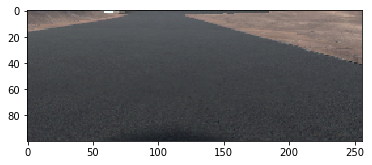

In [5]:
# All at once
img_crop_up = img[126:226]
print('Type:',type(img_crop_up),'shape:',img_crop_up.shape,'numpy type:',img_crop_up.dtype)
plt.imshow(img_crop_up)
plt.show()

## Cropping (slicing) on Tensorflow

In [6]:
# Create a placeholder for images
in_image = tf.placeholder(tf.uint8, shape=[256, 256, 3], name="image_in_test")
# Crop up part
out_image_crop_up = tf.slice(in_image, [126,0,0], [130, 256, 3])

# Crop bottom part
out_image_crop_bottom = tf.slice(out_image_crop_up, [0,0,0], [100, 256, 3])

# Crop both parts
out_image_crop_both = tf.slice(in_image, [126,0,0], [100, 256, 3])

In [7]:
# Build graph
sess = tf.InteractiveSession()

Type: <class 'numpy.ndarray'> shape: (130, 256, 3) numpy type: uint8


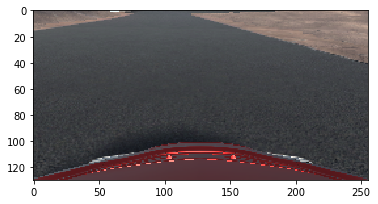

In [8]:
img_result = sess.run(out_image_crop_up, feed_dict={in_image: img})
print('Type:',type(img_result),'shape:',img_result.shape,'numpy type:',img_result.dtype)
plt.imshow(img_result)
plt.show()

Type: <class 'numpy.ndarray'> shape: (100, 256, 3) numpy type: uint8


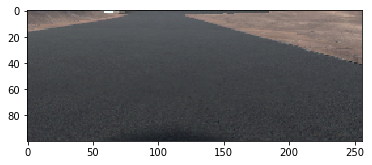

In [9]:
img_result = sess.run(out_image_crop_bottom, feed_dict={in_image: img})
print('Type:',type(img_result),'shape:',img_result.shape,'numpy type:',img_result.dtype)
plt.imshow(img_result)
plt.show()

Type: <class 'numpy.ndarray'> shape: (100, 256, 3) numpy type: uint8


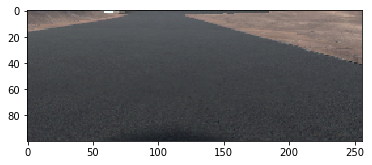

In [10]:
img_result = sess.run(out_image_crop_both, feed_dict={in_image: img})
print('Type:',type(img_result),'shape:',img_result.shape,'numpy type:',img_result.dtype)
plt.imshow(img_result)
plt.show()